# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Habtom Woldu 

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [292]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from spacytextblob.spacytextblob import SpacyTextBlob




!pip list

print('All prereqs installed.')

Package             Version
------------------- -----------
annotated-types     0.6.0
asttokens           2.4.1
beautifulsoup4      4.12.3
blis                0.7.11
catalogue           2.0.10
certifi             2024.2.2
cffi                1.16.0
charset-normalizer  3.3.2
click               8.1.7
cloudpathlib        0.16.0
colorama            0.4.6
comm                0.2.2
confection          0.1.4
contourpy           1.2.1
cryptography        42.0.5
cycler              0.12.1
cymem               2.0.8
debugpy             1.8.1
decorator           5.1.1
en-core-web-sm      3.7.1
exceptiongroup      1.2.0
executing           2.0.1
fonttools           4.51.0
html5lib            1.1
idna                3.6
importlib_metadata  7.1.0
importlib_resources 6.4.0
ipykernel           6.29.4
ipython             8.18.1
jedi                0.19.1
Jinja2              3.1.3
joblib              1.4.0
jupyter_client      8.6.1
jupyter_core        5.7.2
kiwisolver          1.4.5
langcodes           

The link provided the article I am intersted in https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7951562/


1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [293]:
import requests
from bs4 import BeautifulSoup
import pickle

# URL of the webpage
#url = 'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9244123/'
url = ("https://www.nature.com/articles/s41598-023-41478-7")


# Fetch the webpage content
response = requests.get(url)
article_page = requests.get(url)
article_html= article_page.text
# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Find the article content
article_content = soup.find('article').prettify()

# Dump the article content to a .pkl file
with open('python-match.pkl', 'wb') as f:
    pickle.dump(article_page, f)

with open('python-match.pkl', 'rb') as f:
    htmldoc = pickle.load(f)
print("Article content dumped to article_content.pkl")

Article content dumped to article_content.pkl


In [294]:
import requests
import pickle
r= requests.get("https://www.nature.com/articles/s41598-023-41478-7")
with open('python-match.pkl','wb') as f:
    pickle.dump(r.text,f)

In [295]:
import requests
from bs4 import BeautifulSoup
import pickle

# URL of the webpage
url = ("https://www.nature.com/articles/s41598-023-41478-7")
with open('python-match.pkl', 'rb') as f:
    htmldoc = pickle.load(f)
# Fetch the webpage content
response = requests.get(url)
article_page = requests.get(url)
article_html= article_page.text
# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Find the article content
article_content = soup.find('article').prettify()



print("Article content dumped to article_content.pkl")

Article content dumped to article_content.pkl


2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [296]:
import pickle
import spacy
from bs4 import BeautifulSoup
from spacytextblob.spacytextblob import SpacyTextBlob

# Load the article content from the .pkl file
with open('python_match.pkl', 'rb') as f:
    htmldoc = pickle.load(f)

soup = BeautifulSoup(htmldoc, 'html.parser')

text = soup.find('article')
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

doc = nlp(text.get_text())
print("Polarity score of the article:", doc._.blob.polarity)

num_sentences = sum(1 for _ in doc.sents)
print("Number of sentences in the article:", num_sentences)


Polarity score of the article: 0.0784935866772883
Number of sentences in the article: 430


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [297]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import pickle
from bs4 import BeautifulSoup
from collections import Counter

# Load the HTML content from the pickle file
with open('python-match.pkl', 'rb') as f:
    htmldoc = pickle.load(f)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(htmldoc, 'html5lib')

# Find the article text
text = soup.find('article').get_text()

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

# Add the SpacyTextBlob component to the pipeline
nlp.add_pipe('spacytextblob')

# Process the article text with spaCy
doc = nlp(text)

# Define function to filter out non-important tokens
def cool_words(token):
    return not (token.is_space or token.is_punct or token.is_stop)

# Extract important tokens
important_tokens = [token.text.lower() for token in doc if cool_words(token)]

# Count the frequencies of the lowercase important tokens
word_freq = Counter(important_tokens)

# Print the 5 most common tokens and their frequencies
print("Top 5 most frequent tokens and their frequencies:")
for token, freq in word_freq.most_common(5):
    print(f"{token}: {freq}")


Top 5 most frequent tokens and their frequencies:
covid-19: 133
vaccine: 110
vaccines: 101
tweets: 80
countries: 56


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [298]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import pickle
from bs4 import BeautifulSoup
from collections import Counter

# Load the HTML content from the pickle file
with open('python-match.pkl', 'rb') as f:
    htmldoc = pickle.load(f)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(htmldoc, 'html5lib')

# Find the article text
text = soup.find('article').get_text()

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

# Add the SpacyTextBlob component to the pipeline
nlp.add_pipe('spacytextblob')

# Process the article text with spaCy
doc = nlp(text)

# Define function to filter out non-important tokens
def cool_words(token):
    return not (token.is_space or token.is_punct or token.is_stop)

# Extract important lemmas
important_lemmas = [token.lemma_.lower() for token in doc if cool_words(token)]

# Count the frequencies of the lowercase important lemmas
word_freq = Counter(important_lemmas)

# Print the 5 most common lemmas and their frequencies
print("Top 5 most frequent lemmas and their frequencies:")
for lemma, freq in word_freq.most_common(5):
    print(f"{lemma}: {freq}")


Top 5 most frequent lemmas and their frequencies:
vaccine: 210
covid-19: 133
tweet: 85
country: 76
vaccination: 58


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

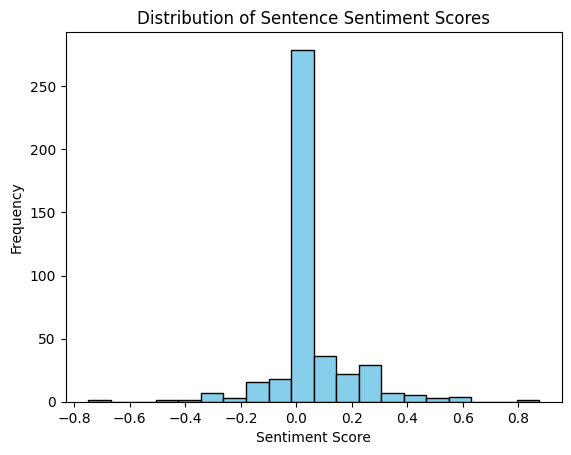

In [299]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import pickle
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Load the HTML content from the pickle file
with open('python-match.pkl', 'rb') as f:
    htmldoc = pickle.load(f)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(htmldoc, 'html5lib')

# Find the article text
text = soup.find('article').get_text()

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

# Add the SpacyTextBlob component to the pipeline
nlp.add_pipe('spacytextblob')

# Process the article text with spaCy
doc = nlp(text)

# Calculate sentiment scores for each sentence
sentence_scores = [sentence._.polarity for sentence in doc.sents]

# Plot a histogram of the sentence scores
plt.hist(sentence_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentence Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


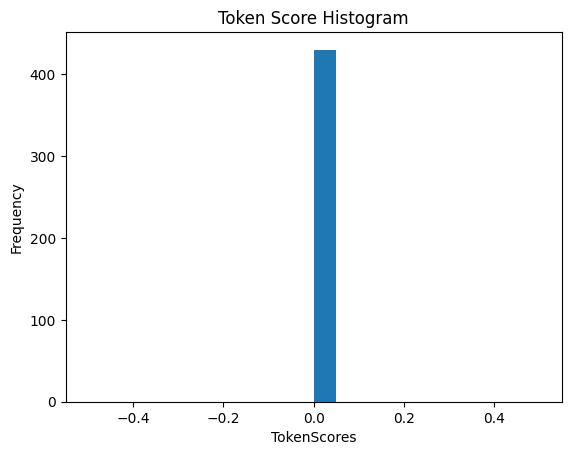

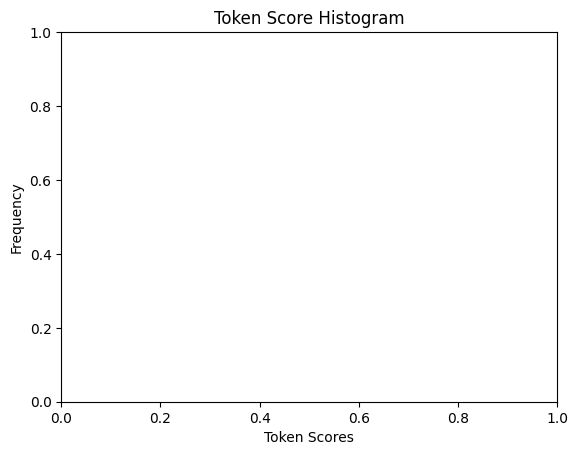

In [300]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import pickle
from bs4 import BeautifulSoup
from collections import Counter
import numpy as np


# Load the pickled HTML content
with open('python_match.pkl', 'rb') as f:
    article_content = pickle.load(f)

# Create a BeautifulSoup object using the default parser
soup = BeautifulSoup(article_content, 'html.parser')

# Create a BeautifulSoup object using the default pars
article_element = soup.find('article')

# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

# Process the text with spaCy
doc = nlp(article_element.get_text())

# Define a function to filter out unwanted tokens
def cool_words(token):
    return not (token.is_space or token.is_punct or token.is_stop)

# Get the most common tokens and lemmas
interesting_tokens = set()
token_freq = Counter(map(str, interesting_tokens))
interesting_token = set()
for token, freq in token_freq.most_common(5):
    interesting_token.add(token)
interesting_lemmas = [token.lemma_.lower()for token in doc if cool_words(token)]
lemma_freq = Counter(interesting_lemmas)
interesting_lemmas = set()
for lemma, freq in lemma_freq.most_common(5):
    interesting_lemmas.add(lemma)
 # Define a function to score sentences by token
def score_sentence_by_token(sentence, interesting_token):
    count = 0
    count2 = 1
    for token in sentence:
        if token.text.lower() in interesting_token:
            count += 1
        if not (token.is_space or token.is_punct):
            count2 += 1
    return count / count2

# file_path = file_path = r'C:\Users\habto\Desktop\NWMS classes\Wemining and NLP\Module 6\web-scraping\article_content.pkl'

def score_sentence_by_lemma(sentence1,interesting_lemmas):
    count = 0
    count2=1
    for token in sentence1 :
        if token.lemma_.lower()in interesting_lemmas:
            count+= 1
        if not (token.lemma.is_space or token.is_punct):
            count2 +=1
    return count/count2
            
# Calculate scores for each sentence
list_of_token_scores = []
sentence_numbers=[]
for i, sent in enumerate(doc.sents):
    list_of_token_scores.append(score_sentence_by_token(sent, interesting_token))
    sentence_numbers.append(i)

# Plot the histogram
fig, ax = plt.subplots()
ax.hist(list_of_token_scores, bins=20)
labels=ax.get_xticklabels()
ax.set(xlabel='TokenScores', ylabel='Frequency', title='Token Score Histogram')
plt.show()
# Adjust the number of bins as needed
plt.xlabel('Token Scores')
plt.ylabel('Frequency')
plt.title('Token Score Histogram')
plt.show()


6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

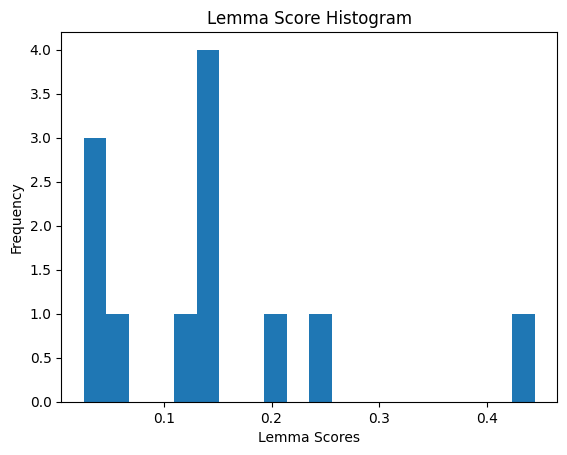

In [301]:
import spacy
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
from collections import Counter

# Define the function to score sentences by lemma
def score_sentence_by_lemma(sentence, interesting_lemmas):
    lemma_scores = 0
    num_words = len(sentence)
    for word in sentence:
        if word.lemma_.lower() in interesting_lemmas:
            lemma_scores += 1
    return lemma_scores / num_words

# Define the URL
url = "https://www.nature.com/articles/s41598-023-41478-7"

# Fetch the webpage content
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Find the appropriate tag containing the article content
article_content = soup.find('div', class_='c-article-section__content')

# Extract the text from the article content
article_text = article_content.get_text() if article_content else ""

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

# Process the article text with spaCy
doc = nlp(article_text)

# Define a function to filter out unwanted tokens
def cool_words(token):
    return not (token.is_space or token.is_punct or token.is_stop)

# Get the most common lemmas
lemma_freq = Counter([token.lemma_.lower() for token in doc if cool_words(token)])
interesting_lemmas = set()
for lemma, freq in lemma_freq.most_common(5):
    interesting_lemmas.add(lemma)

# Make a list containing the scores (using lemmas) of every sentence in the article
list_of_lemma_scores = [score_sentence_by_lemma(sentence, interesting_lemmas) for sentence in doc.sents]

# Plot the histogram
fig, ax = plt.subplots()
ax.hist(list_of_lemma_scores, bins=20)
ax.set(xlabel='Lemma Scores', ylabel='Frequency', title='Lemma Score Histogram')
plt.show()





7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [302]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import pickle
from bs4 import BeautifulSoup
from collections import Counter

# Load the pickled HTML content
with open('python_match.pkl', 'rb') as f:
    htmldoc = pickle.load(f)

soup = BeautifulSoup(htmldoc, 'html.parser')
text = soup.find('article')
nlp = spacy.load('en_core_web_sm')
doc=nlp(text.get_text())



def summarizer(doc):
    # Define important words for sapcy
    def important_words(token):
        return not (token.is_space or token.is_punct or token.is_stop)
    
    important_tokens = [token for token in doc if important_words(token)]
    token_freq = Counter(map(str, important_tokens))
    important_tokens = set()
    for token, freq in token_freq.most_common(5):
        important_tokens.add(token)
def score_sentence_by_token(sentence1, interesting_token):
        count = 0
        count2 = 1
        for token in sentence1:
            if token.text.lower() in interesting_token:
                count += 1
        for token in sentence1:
            if not (token.is_space or token.is_punct):
                count2 += 1
        return count / count2

important_sent = []
sentences = list(doc.sents)
for sent in sentences:
        if score_sentence_by_token(sent, important_tokens) >= 0.11:
            important_sent.append(sent.text.strip())
sent_str = str(sentences)
print(' '.join(important_sent))
' '.join(important_sent)
summarizer(doc)



Download PDF








Article

Open access

Published: 31 August 2023

People’s perceptions on COVID-19 vaccination: an analysis of twitter discourse from four countries
Manah Verma1 na1, Nikhil Moudgil1 na1, Gaurav Goel2, Peehu Pardeshi3,4, Jacquleen Joseph3, Neeraj Kumar1,5,6,7,8, Kulbir Singh9, Hari Singh10 & …Prakash Babu Kodali11 Show authors

Scientific Reports
volume 13, Article number: 14281 (2023)
            Cite this article




2477 Accesses


5 Altmetric


Metrics details





Subjects

Health careHealth policyHealth servicesPublic health




AbstractMore than six and half million people have died as a result of the COVID-19 pandemic till Dec 2022. Vaccination is the most effective means to prevent mortality and infection attributed to COVID-19. Identifying public attitudes and perceptions on COVID-19 vaccination is essential to strengthening the vaccination programmes. This study aims to identify attitudes and perceptions of twitter users towards COVID-19 vaccinations in f

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [303]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import pickle
from bs4 import BeautifulSoup
from collections import Counter

# Load the pickled HTML content
with open('python_match.pkl', 'rb') as f:
    htmldoc = pickle.load(f)

soup = BeautifulSoup(htmldoc, 'html.parser')
text = soup.find('article')
nlp = spacy.load('en_core_web_sm')
doc = nlp(text.get_text())


def summarizer(doc):
    # Define important words for spacy
    def important_words(token):
        return not (token.is_space or token.is_punct or token.is_stop)
    important_tokens = [token for token in doc if important_words(token)]
    token_freq = Counter(map(str, important_tokens))
    important_tokens = set()
    for token, freq in token_freq.most_common(5):
        important_tokens.add(token)
        
    # Score of Sentence Function by token
    def score_sentence_by_token(sentence1, interesting_token):
        count = 0
        count2 = 1
        for token in sentence1:
            if token.text.lower() in interesting_token:
                count += 1
        for token in sentence1:
            if not (token.is_space or token.is_punct):
                count2 += 1
        return count / count2

    important_sent = []
    sentences = list(doc.sents)
    for sent in sentences:
        if score_sentence_by_token(sent, important_tokens) >= 0.11:
            important_sent.append(sent.text.strip())
    return ' '.join(important_sent)

summary = summarizer(doc)
print(summary)

new_doc = nlp(summary)
print('Polarity Score of the Article:', new_doc._.polarity)

num_sentences = len(list(new_doc.sents))
print("Number of Sentences in Article:", num_sentences)


A sample of 2000 tweets (500 from each country) were thematically analysed to explore the people’s perception concerning COVID-19 vaccines across the countries. The attitudes towards COVID-19 vaccines varied by countries. The qualitative analysis yielded eight themes namely (i) vaccine shortages, (ii) vaccine side-effects, (iii) distrust on COVID-19 vaccines, (iv) voices for vaccine equity, (v) awareness about vaccines, (vi) myth busters, (vii) vaccines work and (viii) vaccines are safe. However, despite vaccines being available in several countries, evidence of hesitancy towards COVID-19 vaccines emerge indicating it as a major public health challenge4.Vaccine hesitancy is characterized as a delay in accepting or refusing vaccines despite the availability of vaccine services. Vaccine hesitancy and vaccine refusal is known to be associated with the outbreaks and reemergence of vaccine preventable diseases4. The countries also account for among the highest doses of COVID-19 vaccines adm

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [305]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import pickle
from bs4 import BeautifulSoup
from collections import Counter

# Load the pickled HTML content
with open('python_match.pkl', 'rb') as f:
    htmldoc = pickle.load(f)

soup = BeautifulSoup(htmldoc, 'html.parser')
text = soup.find('article')
nlp = spacy.load('en_core_web_sm')
doc = nlp(text.get_text())


def summarizer_lemma(doc):
    # Define important words for spacy
    def important_words(token):
        return not (token.is_space or token.is_punct or token.is_stop)
    important_lemmas = [token.lemma_.lower() for token in doc if  important_words(token)]
    lemma_freq = Counter(map(str.lower, important_lemmas))

    
    important_lemmas = set()
    for lemma, freq in lemma_freq.most_common(5):
        important_lemmas.add(lemma)
# Score sentence Function by token
def score_sentence_by_lemma(sentence1, interesting_lemmas):
    count=0
    count2=1
    for taken in sentence1:
            if token.lemma_.lower()in interesting_lemmas:
                count+=1
            if not(token.is_space or token.is_punct):
                count2+=1
    return count/count2
# Create empty list for sentences
important_sent=[]
# Break article into sentences
sentences = list(doc.sents)
for sent in sentences:
    if score_sentence_by_token(sent,important_lemmas) >=0.28:
        important_sent.append(sent.text.strip())
print(' '.join(important_sent))
summarizer_lemma(doc)

Download PDF








Article

Open access

Published: 31 August 2023

People’s perceptions on COVID-19 vaccination: an analysis of twitter discourse from four countries
Manah Verma1 na1, Nikhil Moudgil1 na1, Gaurav Goel2, Peehu Pardeshi3,4, Jacquleen Joseph3, Neeraj Kumar1,5,6,7,8, Kulbir Singh9, Hari Singh10 & …Prakash Babu Kodali11 Show authors

Scientific Reports
volume 13, Article number: 14281 (2023)
            Cite this article




2477 Accesses


5 Altmetric


Metrics details





Subjects

Health careHealth policyHealth servicesPublic health




AbstractMore than six and half million people have died as a result of the COVID-19 pandemic till Dec 2022. Vaccination is the most effective means to prevent mortality and infection attributed to COVID-19. Identifying public attitudes and perceptions on COVID-19 vaccination is essential to strengthening the vaccination programmes. A sentiment analysis of 663,377 tweets from October 2020 to September 2022 from four different countries 

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [ ]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import pickle
from bs4 import BeautifulSoup
from collections import Counter

# Load the pickled HTML content
with open('python_match.pkl', 'rb') as f:
    htmldoc = pickle.load(f)

soup = BeautifulSoup(htmldoc, 'html.parser')
text = soup.find('article')
nlp = spacy.load('en_core_web_sm')
doc = nlp(text.get_text())


def summarizer_lemma(doc):
    # Define important words for spacy
    def important_words(token):
        return not (token.is_space or token.is_punct or token.is_stop)
    
    important_lemmas = [token.lemma_.lower() for token in doc if  important_words(token)]
    lemma_freq = Counter(important_lemmas)
    
    important_lemmas = set()
    for lemma, freq in lemma_freq.most_common(5):
        important_lemmas.add(lemma)
        
    # Score sentence Function by lemma
    def score_sentence_by_lemma(sentence1, interesting_lemmas):
        count = 0
        count2 = 1
        for token in sentence1:
            if token.lemma_.lower() in interesting_lemmas:
                count += 1
            if not (token.is_space or token.is_punct):
                count2 += 1
        return count / count2
    
    # Create empty list for sentences
    important_sent = []
    # Break article into sentences
    sentences = list(doc.sents)
    for sent in sentences:
        if score_sentence_by_lemma(sent, important_lemmas) >= 0.28:
            important_sent.append(sent.text.strip())
    return ' '.join(important_sent)

summary = summarizer_lemma(doc)
print(summary)


The attitudes towards COVID-19 vaccines varied by countries. Vaccines work!”


12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?